In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math
import re
import plotly.express as px
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
file_path = r'C:\Users\Farnaz Ashrafi\Desktop\project_test\portfolio_project\data\raw\\'
df = pd.read_csv(file_path + 'XGBoost_train.csv')

#test = pd.read_csv(file_path + 'test.csv')
#submission = pd.read_csv(file_path + 'sample_submission.csv') 
#original = pd.read_csv(file_path + 'machine failure.csv')

#display(df.shape, df.head(),test.head())

In [5]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [136]:
filtered_df = df[(df['Machine failure'] != 0) | (df['TWF'] != 0) | (df['HDF'] != 0) | (df['PWF'] != 0) | (df['OSF'] != 0) | (df['RNF'] != 0)]

filtered_df.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
130,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
164,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
228,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
236,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
260,260,M18333,M,301.8,310.6,1378,48.3,62,1,0,1,0,0,0
313,313,L49571,L,299.2,308.4,1447,46.6,145,0,0,0,0,0,1
385,385,L50678,L,301.9,311.1,1374,59.8,228,1,0,0,1,1,0
507,507,L56196,L,297.3,308.2,1396,52.6,212,1,1,0,0,0,0
661,661,L53258,L,300.8,310.7,1362,59.1,203,1,0,0,0,1,0


In [137]:
filtered_df = df[(df['Machine failure'] != 0) & (df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]

filtered_df.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
130,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
228,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
888,888,L50551,L,301.4,310.5,1359,51.2,196,1,0,0,0,0,0
1518,1518,L48514,L,299.0,310.4,1536,49.1,15,1,0,0,0,0,0
1806,1806,M19005,M,301.9,310.5,1543,34.6,86,1,0,0,0,0,0
2230,2230,H32278,H,300.6,309.4,1380,47.6,246,1,0,0,0,0,0
2355,2355,M18724,M,302.5,311.4,1629,31.7,225,1,0,0,0,0,0
2708,2708,L48027,L,296.4,307.4,2833,5.6,213,1,0,0,0,0,0
3248,3248,L56844,L,299.1,310.2,1317,46.0,119,1,0,0,0,0,0
3561,3561,M18886,M,302.1,311.0,1574,34.1,215,1,0,0,0,0,0


In [138]:
df_machine_failure_1 = df[df['Machine failure'] == 1]

crosstab_result=pd.crosstab(index=df_machine_failure_1['Machine failure'], 
                              columns=[df_machine_failure_1['TWF'], df_machine_failure_1['HDF'], df_machine_failure_1['PWF'], df_machine_failure_1['OSF'], df_machine_failure_1['RNF']])

crosstab_result.T

Machine failure        1
TWF HDF PWF OSF RNF     
0   0   0   0   0    507
                1      1
            1   0    444
                1      1
        1   0   0    254
                1      1
            1   0     35
    1   0   0   0    628
                1      2
            1   0     40
        1   0   0     20
            1   0      3
1   0   0   0   0    185
                1      1
            1   0     11
        1   0   0      9
            1   0      1
    1   0   0   0      3
            1   0      1
        1   0   0      1

In [197]:
#replace text values with numeric values

type_mapping = {'L': 0, 'M': 1, 'H': 2}

df['Type_numeric'] = df['Type'].map(type_mapping)
test['Type_numeric'] = test['Type'].map(type_mapping)

df['Numeric_ID'] = df['Product ID'].str.extract('(\d+)')
test['Numeric_ID'] = test['Product ID'].str.extract('(\d+)')
df['Numeric_ID'] = pd.to_numeric(df['Numeric_ID'])
test['Numeric_ID'] = pd.to_numeric(test['Numeric_ID'])
display(df.head(),test.head())

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,50096
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1,20343
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,49454
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,53355
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1,24050


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,50896
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,53866
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,50498
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,1,21232
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,1,19751


In [140]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258,0.366476,43688.878516
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461,0.602480,14119.493639
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14865.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31776.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50228.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54137.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,57174.000000


In [173]:
display(df.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
 14  Type

None

None

In [142]:
print('df length: ', df.shape)

print('Number of unique values and data type of the column: ')
for column in df.columns:
    unique_values = df[column].unique()
    column_type = df[column].dtype
    if len(unique_values) < 20:
        print(f"{column}: {column_type},  {len(unique_values)}, {unique_values} " )
        
    else:
        print(f"{column}: {column_type},  {len(unique_values)}")

df length:  (136429, 16)
Number of unique values and data type of the column: 
id: int64,  136429
Product ID: object,  9976
Type: object,  3, ['L' 'M' 'H'] 
Air temperature [K]: float64,  95
Process temperature [K]: float64,  81
Rotational speed [rpm]: int64,  952
Torque [Nm]: float64,  611
Tool wear [min]: int64,  246
Machine failure: int64,  2, [0 1] 
TWF: int64,  2, [0 1] 
HDF: int64,  2, [0 1] 
PWF: int64,  2, [0 1] 
OSF: int64,  2, [0 1] 
RNF: int64,  2, [0 1] 
Type_numeric: int64,  3, [0 1 2] 
Numeric_ID: int64,  9976


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [144]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'Machine failure',
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

numeric_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure',
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

cat_cols = 'Type_numeric'
cat_columns = ['Type_numeric']


In [145]:
#numeric_df = df.select_dtypes(include=['number'])
numeric_df1 = df[num_cols]
correlation_matrix1 = numeric_df1.corr()
correlation_matrix1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.856080,0.016545,-0.006773,0.016994
Process temperature [K],0.856080,1.000000,0.011263,-0.006298,0.012777
Rotational speed [rpm],0.016545,0.011263,1.000000,-0.779394,0.003983
Torque [Nm],-0.006773,-0.006298,-0.779394,1.000000,-0.003148
Tool wear [min],0.016994,0.012777,0.003983,-0.003148,1.000000


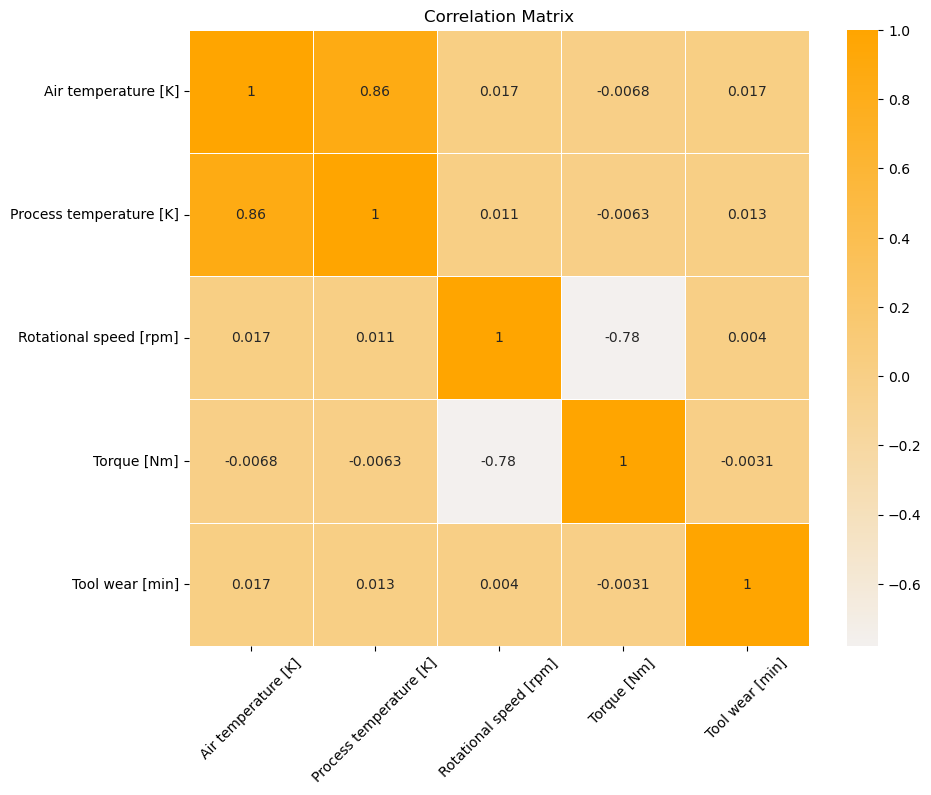

In [146]:
plt.figure(figsize=(10, 8))
light_palette = sns.light_palette("orange", as_cmap=True)
sns.heatmap(correlation_matrix1, annot=True, cmap=light_palette, linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

In [147]:
numeric_df2 = df[binary_cols]
correlation_matrix2 = numeric_df2.corr()
correlation_matrix2

,Machine failure,TWF,HDF,PWF,OSF,RNF
Machine failure,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428
TWF,0.311919,1.000000,0.010145,0.039927,0.036041,0.002044
HDF,0.564507,0.010145,1.000000,0.046680,0.067149,0.000885
PWF,0.383941,0.039927,0.046680,1.000000,0.090016,0.000827
OSF,0.494668,0.036041,0.067149,0.090016,1.000000,-0.000539
RNF,0.001428,0.002044,0.000885,0.000827,-0.000539,1.000000


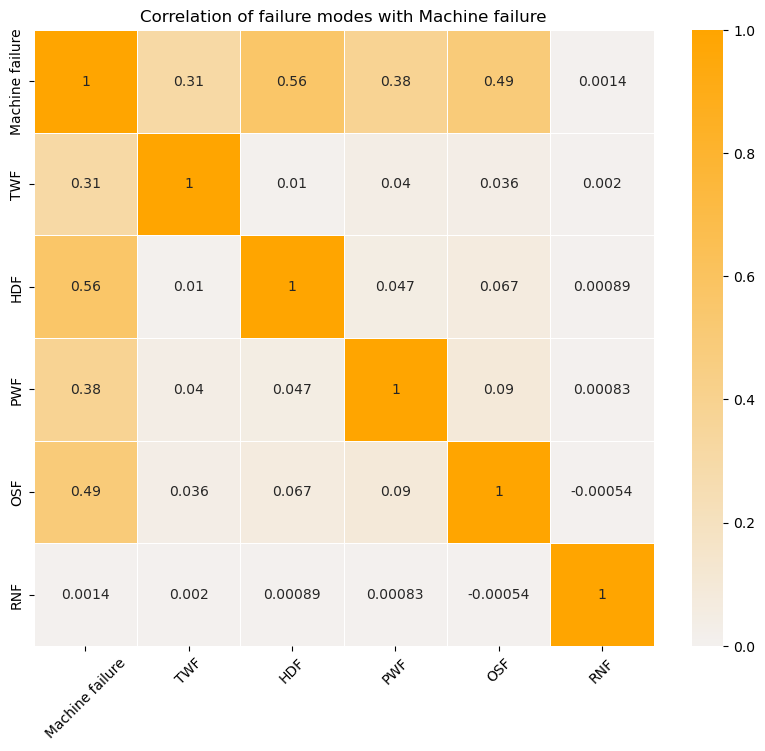

In [148]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap=light_palette, linewidths=0.5)
plt.title('Correlation of failure modes with Machine failure')
plt.xticks(rotation=45)
plt.show()

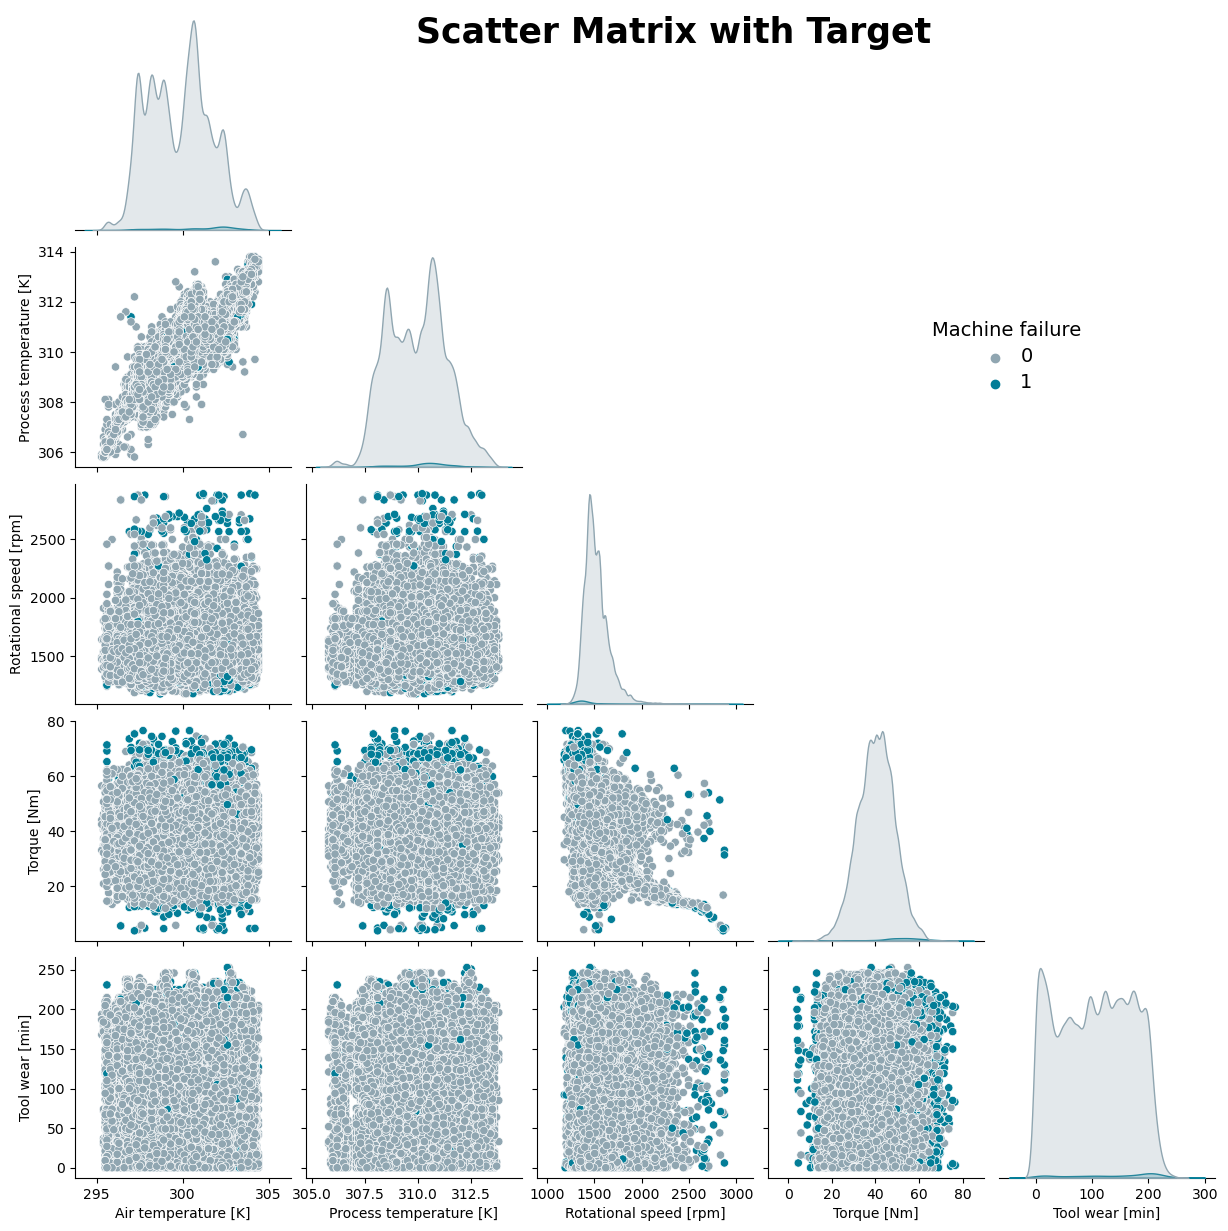

In [149]:
c = ['#90A6B1', '#037d97']

g = sns.pairplot(data=df, x_vars=num_cols, y_vars=num_cols, hue=target_col, corner=True, palette=c)

g._legend.set_bbox_to_anchor((0.8, 0.7))
g._legend.set_title(target_col)
g._legend.loc = 'upper center'
g._legend.get_title().set_fontsize(14)
for item in g._legend.get_texts():
    item.set_fontsize(14)

plt.suptitle(f'Scatter Matrix with Target\n\n', ha='center', fontweight='bold', fontsize=25, y=0.98)
plt.show()

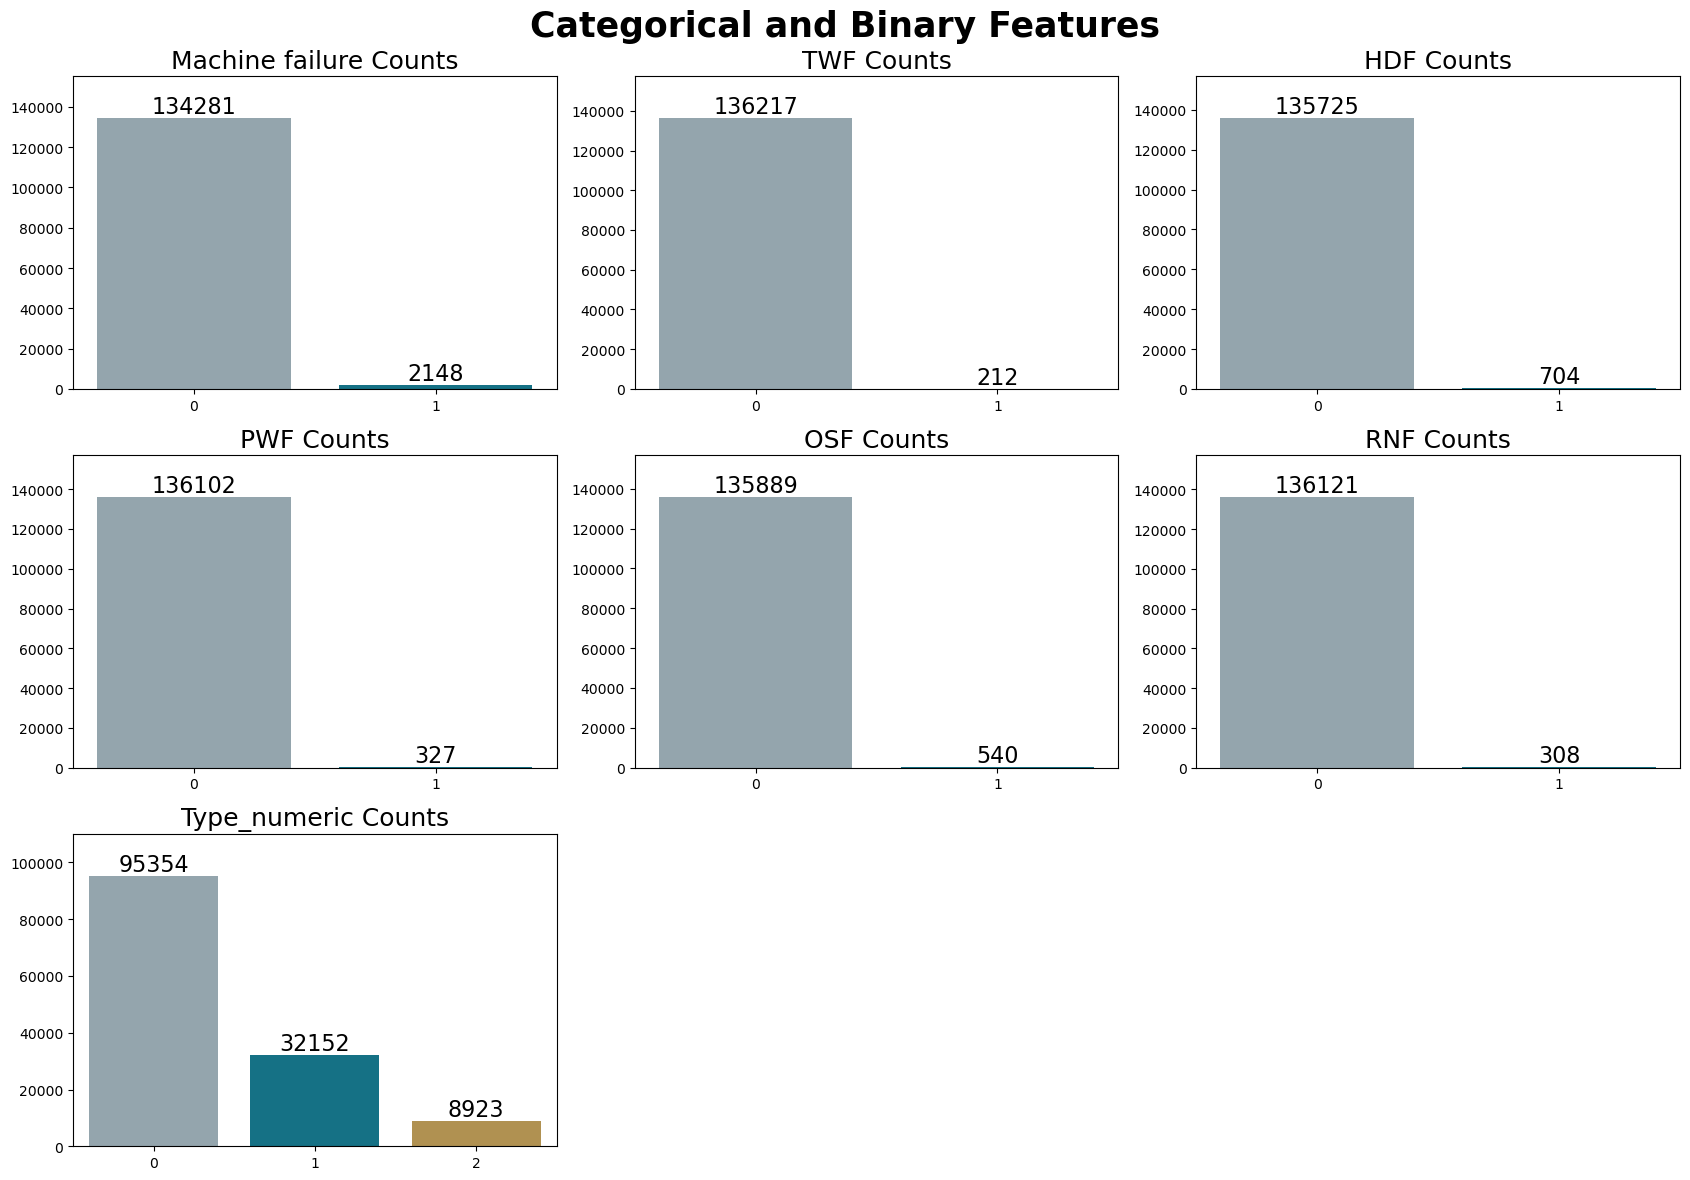

In [150]:
d = ['#90A6B1', '#037d97', '#C09741']

columns = binary_cols + [cat_cols]
n_cols = 3
n_rows = (len(columns) - 1) // n_cols + 1

fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=ax[i], palette=d)
    
    # Titles
    ax[i].set_title(f'{column} Counts', fontsize=18)
    ax[i].set_xlabel(None, fontsize=16)
    ax[i].set_ylabel(None, fontsize=16)

    ax[i].tick_params(axis='x', rotation=0)

    for p in ax[i].patches:
        value = int(p.get_height())
        ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=16)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)

for i in range(len(columns), len(ax)):
    ax[i].axis('off')

fig.suptitle('Categorical and Binary Features', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

In [102]:
crosstab_result = pd.crosstab(index=df['Machine failure'], columns='count', normalize='all') * 100

crosstab_result

col_0,count
Machine failure,
0,98.425555
1,1.574445


In [103]:
crosstab_result = pd.crosstab(index=df['Type_numeric'], columns=df['Machine failure'], margins=True, margins_name="Total", normalize='all') * 100


print(crosstab_result)

Machine failure          0         1       Total
Type_numeric                                    
0                68.723658  1.169106   69.892765
1                23.246524  0.320313   23.566837
2                 6.455372  0.085026    6.540398
Total            98.425555  1.574445  100.000000


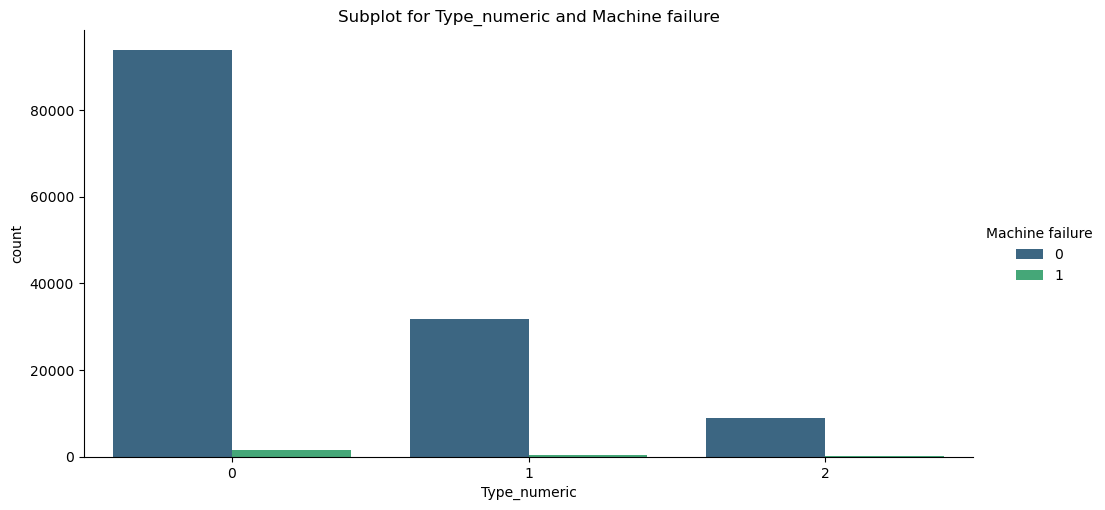

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df[['Type_numeric', 'Machine failure']]

sns.catplot(x='Type_numeric', hue='Machine failure', data=df_subset, kind='count', height=5, aspect=2, palette='viridis')
plt.title("Subplot for Type_numeric and Machine failure")
plt.show()

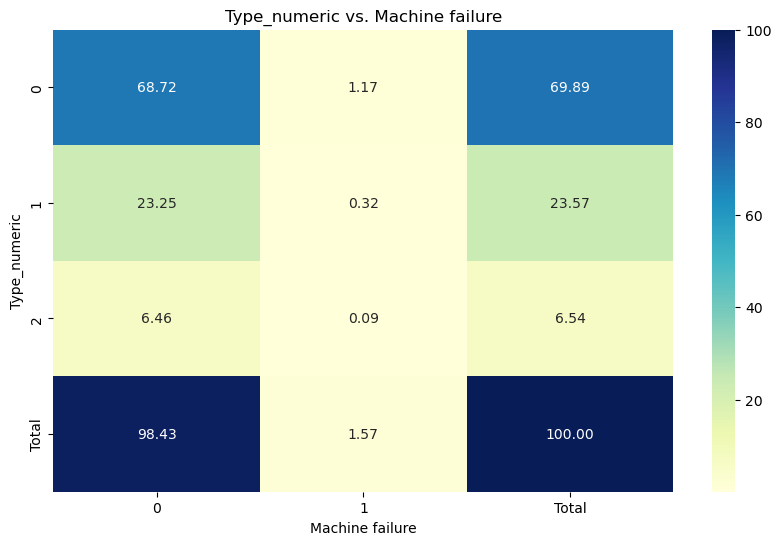

In [131]:
crosstab_result = pd.crosstab(index=df['Type_numeric'], columns=df['Machine failure'], margins=True, margins_name="Total", normalize='all') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_result, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Type_numeric vs. Machine failure")
plt.show()

In [11]:
empty_rows_count_df = df.isna().all(axis=1).sum()
empty_rows_count_test = test.isna().all(axis=1).sum()
print(f"Empty rows in DataFrame: {empty_rows_count_df}, Empty rows in DataFrame: {empty_rows_count_test} ")

Empty rows in DataFrame: 0, Empty rows in DataFrame: 0 


In [174]:
duplicate_rows_count = df.duplicated().sum()

print(f"Number of duplicate rows in DataFrame: {duplicate_rows_count}")

Number of duplicate rows in DataFrame: 0


In [198]:
df = df.drop(['Product ID', 'id', 'Type'], axis = 1)
test = test.drop(['Product ID','id', 'Type'], axis = 1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,50096
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1,20343
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,49454
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,53355
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1,24050


In [191]:
var = pd.crosstab(index=df["Numeric_ID"], columns='ratio', 
                  normalize='columns').sort_values(by='ratio', ascending=False)
# Print top 10 categories
print(var.index[:10])

Index([53257, 49056, 53271, 48892, 54275, 53258, 54255, 56257, 53140, 48894], dtype='int64', name='Numeric_ID')


In [192]:
X = df.drop(['Machine failure'], axis = 1)
y = df['Machine failure']

In [193]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,50096
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,1,20343
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,49454
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,53355
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,1,24050


In [199]:
#Let's make a copy of the base for the first base model#
features_train_bm = features_train.copy()
features_test_bm = features_test.copy()
target_train_bm = target_train.copy()
target_test_bm = target_test.copy()

In [200]:
features_train_bm.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
12407,301.5,310.7,1481,43.7,77,0,0,0,0,0,0,53889
85011,300.7,309.5,1452,43.4,85,0,0,0,0,0,0,50140
65292,298.5,309.1,1365,57.0,27,0,0,0,0,0,1,24687
18478,301.6,310.7,1543,31.9,16,0,0,0,0,0,0,50785
100267,298.9,308.6,1633,32.9,124,0,0,0,0,0,0,49210


In [201]:
features_train_bm=features_train_bm.drop('Numeric_ID', axis=1)
features_test_bm=features_test_bm.drop('Numeric_ID', axis=1)
features_train_bm.dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
Type_numeric                 int64
dtype: object

In [202]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

features_train_bm_sc = scaler.fit_transform(features_train_bm)
features_test_bm_sc = scaler.transform(features_test_bm)

columns = features_train_bm.columns
features_train_bm=pd.DataFrame(features_train_bm_sc, columns=columns)
features_test_bm=pd.DataFrame(features_test_bm_sc, columns=columns)

In [203]:
#features_train_bm = pd.DataFrame(features_train_bm)
features_train_bm.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_numeric
count,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05,1.091430e+05
mean,-4.618101e-14,2.550123e-14,-4.401546e-16,1.058689e-15,1.927019e-17,1.262979e-17,1.009081e-17,-2.695223e-17,1.236938e-17,1.520132e-17,-2.382733e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.452660e+00,-2.990831e+00,-2.446190e+00,-4.276923e+00,-1.628596e+00,-3.843577e-02,-7.162105e-02,-4.867723e-02,-6.369429e-02,-4.714024e-02,-6.097551e-01
25%,-8.403693e-01,-8.253258e-01,-6.360440e-01,-6.761543e-01,-8.790401e-01,-3.843577e-02,-7.162105e-02,-4.867723e-02,-6.369429e-02,-4.714024e-02,-6.097551e-01
50%,7.326194e-02,4.087642e-02,-2.033399e-01,1.811144e-02,2.667309e-02,-3.843577e-02,-7.162105e-02,-4.867723e-02,-6.369429e-02,-4.714024e-02,-6.097551e-01
75%,7.181781e-01,6.905281e-01,4.312928e-01,6.770756e-01,8.543075e-01,-3.843577e-02,-7.162105e-02,-4.867723e-02,-6.369429e-02,-4.714024e-02,1.047957e+00
max,2.437955e+00,2.783850e+00,9.849819e+00,4.266077e+00,2.322187e+00,2.601743e+01,1.396238e+01,2.054349e+01,1.569999e+01,2.121330e+01,2.705669e+00


In [204]:
# DecisionTreeClassifier mit Grid_search for basis model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(random_state=42,class_weight='balanced' )

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
#    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(features_train_bm, target_train_bm)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
target_pred_bm = best_model.predict(features_test_bm)

precision = precision_score(target_test_bm, target_pred_bm)
recall = recall_score(target_test_bm, target_pred_bm)
f1 = f1_score(target_test_bm, target_pred_bm)

print("DecisionTreeClassifier mit Grid_search\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier mit Grid_search
-------------
F1 Score: 0.7768969422423557
Precision: 0.7707865168539326
Recall: 0.7831050228310502


gridsearch_results_RandomForestClassifier:
rf_best_estimator_: RandomForestClassifier(class_weight='balanced', max_depth=26, n_estimators=50,
                       random_state=42)
rf_best_score_: 0.8541487588268468


F1_rf:  0.8571428571428571
Precision_rf:  0.9823008849557522
Recall_rf:  0.7602739726027398


<Axes: >

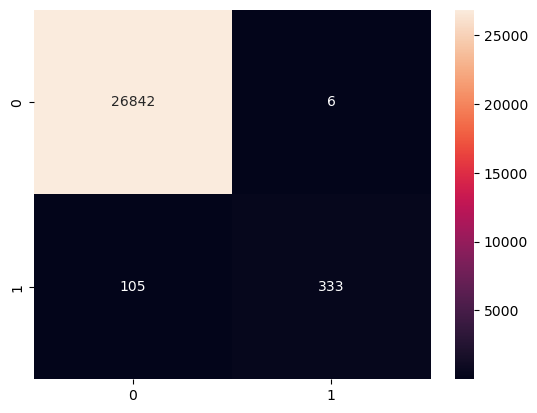

In [207]:
# RandomForestClassifier mit Grid_search for basis model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model_rf=RandomForestClassifier(n_estimators=50 , class_weight='balanced' , random_state=42)
search_space_rf = {'max_depth': np.geomspace(start=3, stop=50, num=10, dtype='int'),
'min_samples_leaf': np.geomspace(start=1, stop=500, num=10, dtype='int')}

model_rf_optimized=GridSearchCV(estimator=model_rf , param_grid=search_space_rf , cv=5 , scoring='f1' , n_jobs=-1)

model_rf_optimized.fit(features_train_bm , target_train_bm)

target_test_pred_optimized_rf=model_rf_optimized.predict(features_test_bm)

print('gridsearch_results_RandomForestClassifier:')
print('rf_best_estimator_:',model_rf_optimized.best_estimator_)
print('rf_best_score_:',model_rf_optimized.best_score_)
print('\n')
print('F1_rf: ', f1_score(target_test_bm, target_test_pred_optimized_rf))
print('Precision_rf: ', precision_score(target_test_bm, target_test_pred_optimized_rf))
print('Recall_rf: ', recall_score(target_test_bm, target_test_pred_optimized_rf))
confusion_matrix_rf_optimized= confusion_matrix(target_test_bm, target_test_pred_optimized_rf)
sns.heatmap(confusion_matrix_rf_optimized, annot=True, fmt='d')

In [ ]:
##################################################
#below the code also remains, but for the final model we took the code presented in the file Farnaz_final_project.

In [77]:
#add a few features to our model (X_scaler_nf (with new features)):
#Temperature Ratio: Process temperature / Air temperature
#Tool Process Temperature: Process temperature * Tool Wear
#Rotation to Power: Rotation ~ Torque interaction
#Torque to Power: Torque ~ Rotation interaction

X_nf = X.copy()
test_nf = test.copy()

X_nf["temp_ratio"] = X_nf["Process temperature [K]"] / X_nf["Air temperature [K]"]
test_nf["temp_ratio"] = test_nf["Process temperature [K]"] / test_nf["Air temperature [K]"]

X_nf["tool_process"]=X_nf["Tool wear [min]"] * X_nf["Process temperature [K]"]
test_nf["tool_process"]=test_nf["Tool wear [min]"] * test_nf["Process temperature [K]"]

X_nf['speed_power'] = X_nf['Rotational speed [rpm]'] * (2 * np.pi / 60) / (X_nf['Rotational speed [rpm]'] * (2 * np.pi / 60) * X_nf['Torque [Nm]'])
test_nf['speed_power'] = test_nf['Rotational speed [rpm]'] * (2 * np.pi / 60) / (test_nf['Rotational speed [rpm]'] * (2 * np.pi / 60) * test_nf['Torque [Nm]'])

X_nf['torque_power'] = X_nf['Torque [Nm]'] / (X_nf['Rotational speed [rpm]'] * (2 * np.pi / 60) * X_nf['Torque [Nm]'])
test_nf['torque_power'] = test_nf['Torque [Nm]'] / (test_nf['Rotational speed [rpm]'] * (2 * np.pi / 60) * test_nf['Torque [Nm]'])

display(X_nf.head(),test_nf.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Type_numeric,Numeric_ID,temp_ratio,tool_process,speed_power,torque_power
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,50096,1.029940,43344.0,0.027701,0.005983
1,302.6,312.1,1759,29.1,200,0,0,0,0,1,20343,1.031395,62420.0,0.034364,0.005429
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,49454,1.030738,7712.5,0.037736,0.005290
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,53355,1.032890,61247.3,0.022573,0.006266
4,298.0,309.0,1641,35.4,34,0,0,0,0,1,24050,1.036913,10506.0,0.028249,0.005819


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Type_numeric,Numeric_ID,temp_ratio,tool_process,speed_power,torque_power
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,50896,1.030433,18690.0,0.026316,0.006370
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,53866,1.030825,5287.0,0.034722,0.005575
2,301.3,310.4,1525,37.7,96,0,0,0,0,0,50498,1.030202,29798.4,0.026525,0.006262
3,300.1,309.6,1479,47.6,5,0,0,0,0,1,21232,1.031656,1548.0,0.021008,0.006457
4,303.4,312.3,1515,41.3,114,0,0,0,0,1,19751,1.029334,35602.2,0.024213,0.006303


In [78]:
#Standardising the numerical columns 
scaler = MinMaxScaler()

X_scaler = scaler.fit_transform(X)
test_scaler = scaler.transform(test)

X_scaler_nf = scaler.fit_transform(X_nf)
test_scaler_nf = scaler.transform(test_nf)


In [57]:
#Splitting the Scaled Dataset into train test splits
features_train, features_test, target_train, target_test = train_test_split(X_scaler, y, random_state = 42, train_size = 0.80)
features_train_nf, features_test_nf, target_train_nf, target_test_nf = train_test_split(X_scaler_nf, y, random_state = 42, train_size = 0.80)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)


print('data base with new features: ', features_train_nf.shape, features_test_nf.shape, target_train_nf.shape, target_test_nf.shape)


(109143, 11) (27286, 11) (109143,) (27286,)
data base with new features:  (109143, 15) (27286, 15) (109143,) (27286,)


In [18]:
#Using DecisionTreeClassifier and Random Forest Classifier to build the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
#from imblearn.over_sampling import SMOTE, RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline #our new pipeline builer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [19]:
test.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_numeric,Numeric_ID
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,50896
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,53866
2,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,50498
3,300.1,309.6,1479,47.6,5,0,0,0,0,0,1,21232
4,303.4,312.3,1515,41.3,114,0,0,0,0,0,1,19751


In [20]:
#DecisionTreeClassifier with class_weight='balanced'

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

clf.fit(features_train, target_train)

target_pred = clf.predict(features_test)

precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("DecisionTreeClassifier with class_weight='balanced'\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

DecisionTreeClassifier with class_weight='balanced'
-------------
F1 Score: 0.7548906789413119
Precision: 0.7610208816705336
Recall: 0.7488584474885844


In [39]:
#DecisionTreeClassifier with class_weight='balanced' for a model with new features
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

clf.fit(features_train_nf, target_train_nf)

target_pred_nf = clf.predict(features_test_nf)

precision = precision_score(target_test_nf, target_pred_nf)
recall = recall_score(target_test_nf, target_pred_nf)
f1 = f1_score(target_test_nf, target_pred_nf)

print("DecisionTreeClassifier with class_weight='balanced' for a model with new features \n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

DecisionTreeClassifier with class_weight='balanced' for a model with new features 
-------------
F1 Score: 0.7486033519553074
Precision: 0.7330415754923414
Recall: 0.7648401826484018


In [21]:
#DecisionTreeClassifier with class_weight=None

clf = DecisionTreeClassifier(random_state=42, class_weight=None)

clf.fit(features_train, target_train)

target_pred = clf.predict(features_test)

precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("DecisionTreeClassifier with class_weight=None\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

DecisionTreeClassifier with class_weight=None
-------------
F1 Score: 0.7688838782412627
Precision: 0.7594654788418709
Recall: 0.7785388127853882


In [40]:
#DecisionTreeClassifier with class_weight=None for a model with new features

clf = DecisionTreeClassifier(random_state=42, class_weight=None)

clf.fit(features_train_nf, target_train_nf)

target_pred_nf = clf.predict(features_test_nf)

precision = precision_score(target_test_nf, target_pred_nf)
recall = recall_score(target_test_nf, target_pred_nf)
f1 = f1_score(target_test_nf, target_pred_nf)

print("DecisionTreeClassifier with class_weight=None for a model with new features\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

DecisionTreeClassifier with class_weight=None for a model with new features
-------------
F1 Score: 0.7692307692307693
Precision: 0.7516339869281046
Recall: 0.7876712328767124


In [23]:
#DecisionTreeClassifier mit Grid_search

from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42,class_weight='balanced' )

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
#    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
target_pred = best_model.predict(features_test)

precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("DecisionTreeClassifier mit Grid_search\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier mit Grid_search
-------------
F1 Score: 0.7643742953776775
Precision: 0.755011135857461
Recall: 0.773972602739726


In [41]:
#DecisionTreeClassifier mit Grid_search for a model with new features

clf = DecisionTreeClassifier(random_state=42,class_weight='balanced' )

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(features_train_nf, target_train_nf)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
target_pred_nf = best_model.predict(features_test_nf)

precision = precision_score(target_test_nf, target_pred_nf)
recall = recall_score(target_test_nf, target_pred_nf)
f1 = f1_score(target_test_nf, target_pred_nf)

print("DecisionTreeClassifier mit Grid_search for a model with new features\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier mit Grid_search for a model with new features
-------------
F1 Score: 0.7720090293453723
Precision: 0.7633928571428571
Recall: 0.7808219178082192


In [25]:
# Random-Forest-Modell with class_weight='balanced 

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_model.fit(features_train, target_train)

target_pred = rf_model.predict(features_test)

precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("Random-Forest-Modell with class_weight='balanced'\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Random-Forest-Modell with class_weight='balanced'
-------------
F1 Score: 0.864795918367347
Precision: 0.9797687861271677
Recall: 0.773972602739726


In [42]:
# Random-Forest-Modell with class_weight='balanced for a model with new features   
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_model.fit(features_train_nf, target_train_nf)

target_pred_nf = rf_model.predict(features_test_nf)

precision = precision_score(target_test_nf, target_pred_nf)
recall = recall_score(target_test_nf, target_pred_nf)
f1 = f1_score(target_test_nf, target_pred_nf)

print("Random-Forest-Modell with class_weight for a model with new features ='balanced'\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Random-Forest-Modell with class_weight for a model with new features ='balanced'
-------------
F1 Score: 0.8396349413298566
Precision: 0.9787234042553191
Recall: 0.7351598173515982


In [26]:
#Random-Forest-Modell with class_weight=None
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight=None)

rf_model.fit(features_train, target_train)

target_pred = rf_model.predict(features_test)

precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("Random-Forest-Modell with class_weight=None\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Random-Forest-Modell with class_weight=None
-------------
F1 Score: 0.864795918367347
Precision: 0.9797687861271677
Recall: 0.773972602739726


In [43]:
#Random-Forest-Modell with class_weight =None for a model with new features
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight=None)
rf_model.fit(features_train_nf, target_train_nf)
target_pred_nf = rf_model.predict(features_test_nf)

precision = precision_score(target_test_nf, target_pred_nf)
recall = recall_score(target_test_nf, target_pred_nf)
f1 = f1_score(target_test_nf, target_pred_nf)

print("Random-Forest-Modell with class_weight =None for a model with new features\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Random-Forest-Modell with class_weight =None for a model with new features
-------------
F1 Score: 0.8607918263090678
Precision: 0.9768115942028985
Recall: 0.769406392694064


In [27]:
#Random-Forest-Modell mit GridSearchCV with class_weight='balanced
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced' )

param_grid = {
    'n_estimators': [2, 5, 10],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
#    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

target_pred = best_model.predict(features_test)
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("Random-Forest-Modell mit GridSearchCV with class_weight='balanced'\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random-Forest-Modell mit GridSearchCV with class_weight='balanced'
-------------
F1 Score: 0.8449612403100776
Precision: 0.9732142857142857
Recall: 0.7465753424657534


In [44]:
#Random-Forest-Modell mit GridSearchCV with class_weight='balanced for a model with new features
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced' )

param_grid = {
    'n_estimators': [2, 5, 10],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(features_train_nf, target_train_nf)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

target_pred_nf = best_model.predict(features_test_nf)
precision = precision_score(target_test_nf, target_pred_nf)
recall = recall_score(target_test_nf, target_pred_nf)
f1 = f1_score(target_test_nf, target_pred_nf)

print("Random-Forest-Modell mit GridSearchCV with class_weight='balanced' for a model with new features\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Random-Forest-Modell mit GridSearchCV with class_weight='balanced' for a model with new features
-------------
F1 Score: 0.8279430789133246
Precision: 0.9552238805970149
Recall: 0.730593607305936


In [28]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(class_weight='balanced', random_state=42)

model_log_reg.fit(features_train, target_train)
predictions = model_log_reg.predict(features_test)

precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1 = f1_score(target_test, predictions)

#evaluate
print("LogisticRegression\n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

LogisticRegression
-------------
F1 Score: 0.585487906588824
Precision: 0.4612352168199737
Recall: 0.8013698630136986


In [46]:
#LogisticRegression for a model with new features
from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(class_weight='balanced', random_state=42)

model_log_reg.fit(features_train_nf, target_train_nf)
predictions_nf = model_log_reg.predict(features_test_nf)

precision = precision_score(target_test_nf, predictions_nf)
recall = recall_score(target_test_nf, predictions_nf)
f1 = f1_score(target_test_nf, predictions_nf)

#evaluate
print("LogisticRegression for a model with new features \n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

LogisticRegression for a model with new features 
-------------
F1 Score: 0.5155367231638417
Precision: 0.37321063394683024
Recall: 0.8333333333333334


In [55]:
#LogisticRegression mit GridSearchCV

from sklearn.pipeline import Pipeline

pipeline_log = Pipeline([
     
    ('log', LogisticRegression(solver='saga', class_weight='balanced', max_iter=500, random_state=42))  
])

C_values = np.geomspace(start=0.001, stop=1000, num=5)
search_space_log=[{'log__penalty': ['l1', 'l2'], 'log__C': C_values}]
model_log=GridSearchCV(estimator=pipeline_log,param_grid=search_space_log,scoring='f1',cv=2)
model_log.fit(features_train,target_train)
predictions = model_log.predict(features_test)

precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1 = f1_score(target_test, predictions)

print(model_log.best_estimator_, "Best parameters:", model_log.best_params_, model_log.best_score_)

print("LogisticRegression mit GridSearchCV \n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Pipeline(steps=[('log',
                 LogisticRegression(C=0.03162277660168379,
                                    class_weight='balanced', max_iter=500,
                                    penalty='l1', random_state=42,
                                    solver='saga'))]) Best parameters: {'log__C': 0.03162277660168379, 'log__penalty': 'l1'} 0.7667372389333442
LogisticRegression mit GridSearchCV 
-------------
F1 Score: 0.6116420503909644
Precision: 0.49368863955119213
Recall: 0.8036529680365296


In [ ]:
#LogisticRegression mit GridSearchCV for a model with new features

model_log_nf.fit(features_train_nf,target_train_nf)
predictions_nf = model_log_nf.predict(features_test_nf)

precision = precision_score(target_test_nf, predictions_nf)
recall = recall_score(target_test_nf, predictions_nf)
f1 = f1_score(target_test_nf, predictions_nf)

print(model_log.best_estimator_, "Best parameters:", model_log.best_params_, model_log.best_score_)

print("LogisticRegression mit GridSearchCV for a model with new features \n-------------")
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

In [57]:
#knn_model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(features_train, target_train)

predictions_knn = knn_model.predict(features_test)

accuracy = accuracy_score(target_test, predictions_knn)
classification_report_result = classification_report(target_test, predictions_knn)
f1 = f1_score(target_test, predictions_knn)
precision = precision_score(target_test, predictions_knn)
recall = recall_score(target_test, predictions_knn)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

print(f'F1-score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.9961518727552591

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

F1-score: 0.8648648648648648
Precision: 0.9911504424778761
Recall: 0.7671232876712328


In [58]:
#knn_model for a model with new features

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(features_train_nf, target_train_nf)

predictions_knn_nf = knn_model.predict(features_test_nf)

accuracy = accuracy_score(target_test_nf, predictions_knn_nf)
classification_report_result = classification_report(target_test_nf, predictions_knn_nf)
f1 = f1_score(target_test_nf, predictions_knn_nf)
precision = precision_score(target_test_nf, predictions_knn_nf)
recall = recall_score(target_test_nf, predictions_knn_nf)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

print(f'F1-score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9961152239243568

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.76      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

F1-score: 0.86340206185567
Precision: 0.9911242603550295
Recall: 0.7648401826484018


In [62]:
# import SVC and cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# # training and validation
# model_lin = SVC(kernel='linear')  # instantiate and train linear svm
# scores = cross_val_score(estimator=model_lin, X=features_train, y=target_train, cv=5, scoring='f1', n_jobs=-1)  # 5-fold cross-validation using f1-score and all available cpus
# #features_train, target_train
# print('Mean f1-score:', scores.mean())

model_lin = SVC(kernel='linear')

model_lin.fit(features_train, target_train)

predictions_lin = model_lin.predict(features_test)

precision_lin = precision_score(target_test, predictions_lin)
recall_lin = recall_score(target_test, predictions_lin)
f1_lin = f1_score(target_test, predictions_lin)

print(f'Precision: {precision_lin}')
print(f'Recall: {recall_lin}')
print(f'F1 Score: {f1_lin}')




Precision: 0.9911504424778761
Recall: 0.7671232876712328
F1 Score: 0.8648648648648648


In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

model_lin = SVC(kernel='linear')

grid_search = GridSearchCV(estimator=model_lin, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

grid_search.fit(features_train, target_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

predictions_lin = grid_search.predict(features_test)

precision_lin = precision_score(target_test, predictions_lin)
recall_lin = recall_score(target_test, predictions_lin)
f1_lin = f1_score(target_test, predictions_lin)

print(f'Precision: {precision_lin}')
print(f'Recall: {recall_lin}')
print(f'F1 Score: {f1_lin}')

Best Parameters: {'C': 0.001, 'class_weight': 'balanced'}
Best F1 Score: 0.8621283590503299
Precision: 0.9911504424778761
Recall: 0.7671232876712328
F1 Score: 0.8648648648648648


In [1]:
df

NameError: name 'df' is not defined